In [1]:
%pip install pandas
%pip install matplotlib
%pip install mlxtend
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Projeto 3: Otimizando Estratégias de E-Commerce com Análise de Dados


## Contextualização

O setor de e-commerce cresce rapidamente, mas enfrenta desafios na retenção de clientes, aumento do ticket médio e redução de cancelamentos. Empresas que vendem online precisam entender melhor o comportamento dos consumidores para criar estratégias de marketing mais eficientes e personalizadas.

Neste projeto, você atuará como um analista de dados contratado por uma loja de e-commerce para analisar transações passadas e identificar padrões que possam ajudar a empresa a as vendas, segmentar clientes e reduzir cancelamentos.

As transações estão registradas no arquivo data.csv (anexo).


## Problema de Negócio

Como o e-commerce pode identificar padrões de compra, segmentar clientes de forma eficiente e reduzir cancelamentos para aumentar a lucratividade?


## Objetivos

### 1. Compreensão do Negócio e do Problema

-   Entender a dinâmica do e-commerce, os principais desafios e o que os dados podem revelar sobre os clientes.
-   Definir métricas de sucesso, como:
    -   Taxa de cancelamento.
    -   Ticket médio.
    -   Recorrência de compras.

### 2. Compreensão dos Dados

-   Explorar a estrutura do dataset fornecido.
-   Verificar a qualidade dos dados:
    -   Tratar valores ausentes, duplicados e inconsistentes.
-   Criar novas variáveis que possam ajudar na análise.

### 3. Análise Exploratória de Dados (EDA)

-   Investigar padrões de compras ao longo do tempo.
-   Identificar:
    -   Os produtos mais vendidos.
    -   Produtos frequentemente comprados juntos.
-   Avaliar o impacto dos preços e descontos nas vendas.
-   Analisar padrões de cancelamento de pedidos.

### 4. Segmentação de Clientes

-   Criar grupos de clientes com base em comportamentos de compra.
-   Aplicar técnicas como:
    -   RFM (Recência, Frequência e Valor Monetário).
    -   K-Means Clustering.
-   Analisar as características de cada segmento e sugerir estratégias de marketing personalizadas.

### 5. Geração de Insights e Recomendações

-   Identificar padrões que possam ajudar na redução de cancelamentos.
-   Sugerir estratégias de fidelização para clientes de alto valor.
-   Apontar oportunidades de:
    -   Cross-sell.
    -   Up-sell.
-   Fornecer insights para otimizar promoções e campanhas de marketing.


# Passo 1: Compreensão do Dataset


In [2]:
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(
    file_path,
    delimiter=",",
    encoding="ISO-8859-1",
    dtype=str,
    na_values=["", "NA"],
    keep_default_na=False,
    low_memory=False,
    parse_dates=True,
    infer_datetime_format=True,
)

C:\Users\bruno\AppData\Local\Temp\ipykernel_21608\588784298.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


In [3]:
# Configuração para melhorar a exibição do print
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_rows", 10)

# Exibir as primeiras linhas do dataframe
print(df.head().to_string(index=True))
print("\n")

  InvoiceNo StockCode                          Description Quantity     InvoiceDate UnitPrice CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6  12/1/2010 8:26      2.55      17850  United Kingdom
1    536365     71053                  WHITE METAL LANTERN        6  12/1/2010 8:26      3.39      17850  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8  12/1/2010 8:26      2.75      17850  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6  12/1/2010 8:26      3.39      17850  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6  12/1/2010 8:26      3.39      17850  United Kingdom




# Entendimento do Dataset

O dataset contém informações sobre transações realizadas por uma loja de e-commerce. Abaixo estão as principais colunas, suas descrições e relevância para a análise:

## Colunas do Dataset

1. **InvoiceNo**: Número da fatura, que parece ser um identificador único para cada transação.

    - **Relevância**: Essencial para identificar transações individuais e agrupar produtos comprados juntos.

2. **StockCode**: Código do produto.

    - **Relevância**: Útil para identificar produtos específicos e realizar análises de vendas por item.

3. **Description**: Nome do produto.

    - **Relevância**: Importante para análises de produtos mais vendidos, produtos cancelados e associações entre itens.
    - **Problema**: Contém 1.454 valores ausentes.

4. **Quantity**: Quantidade de produtos vendidos (ou devolvidos, se negativo).

    - **Relevância**: Essencial para calcular o volume de vendas e identificar cancelamentos.
    - **Problema**: Valores negativos indicam devoluções ou cancelamentos.

5. **InvoiceDate**: Data e hora da transação.

    - **Relevância**: Fundamental para análises temporais, como sazonalidade e tendências de vendas.
    - **Problema**: Originalmente no formato texto, foi convertido para `datetime`.

6. **UnitPrice**: Preço unitário do produto.

    - **Relevância**: Necessário para calcular o valor total gasto por transação.
    - **Problema**: Possíveis valores inconsistentes ou fora do esperado.

7. **CustomerID**: Identificação do cliente.

    - **Relevância**: Essencial para análises de comportamento do cliente e segmentação.
    - **Problema**: Contém 135.080 valores ausentes (cerca de 25% dos dados).

8. **Country**: País do cliente.

    - **Relevância**: Útil para identificar mercados principais e oportunidades de expansão.

9. **TotalGasto**: Valor total gasto por transação (calculado como `Quantity * UnitPrice`).

    - **Relevância**: Métrica chave para análises financeiras e de ticket médio.

10. **Date**: Data da transação (sem a hora).
    - **Relevância**: Simplifica análises temporais agregadas.

## Problemas de Qualidade dos Dados

1. **Valores Ausentes**:

    - **Description**: 1.454 valores ausentes.
    - **CustomerID**: 135.080 valores ausentes (não é possível segmentar clientes sem essa informação).

2. **Valores Negativos**:

    - **Quantity**: Valores negativos indicam devoluções ou cancelamentos, que precisam ser tratados separadamente.

3. **Formato de Dados**:

    - **InvoiceDate**: Originalmente no formato texto, foi convertido para `datetime`.

4. **Duplicatas**:

    - Foram identificados 5.225 registros duplicados, que foram removidos.

5. **Inconsistências**:
    - Possíveis valores fora do esperado em `UnitPrice` e `Quantity`, como preços muito altos ou quantidades negativas.


# Passo 2: Limpeza e Preparação dos Dados


In [4]:
# Exibir informações iniciais sobre o dataset
df_missing = df.isnull().sum()
print("Valores ausentes por coluna:\n", df_missing)

# Converter InvoiceDate para datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")

# Tentar converter para numérico (caso estejam como string)
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")

# Criar nova coluna: Total gasto por transação
df["TotalGasto"] = df["Quantity"] * df["UnitPrice"]

# Criar uma nova coluna com a data sem a hora
df["Date"] = pd.to_datetime(df['InvoiceDate']).dt.date

# Remover linhas onde CustomerID está ausente (não é possível segmentar clientes sem essa informação)
df = df.dropna(subset=["CustomerID"])

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"Número de duplicatas no dataset: {duplicates}")

# Informações após a limpeza
print("\nInformações do dataset após limpeza:")
df.info()

df_cleaned_missing = df.isnull().sum()
print("\nValores ausentes após limpeza:\n", df_cleaned_missing)

Valores ausentes por coluna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Número de duplicatas no dataset: 5225

Informações do dataset após limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   TotalGasto   406829 non-null  float64       
 9   Date         406829 non-null  object        

In [5]:
# Verificar se há valores nulos após a conversão
missing_after_conversion = df[["Quantity", "UnitPrice", "TotalGasto"]].isnull().sum()
missing_after_conversion

Quantity      0
UnitPrice     0
TotalGasto    0
dtype: int64

In [6]:
# Criar métrica de ticket médio por cliente
ticket_medio = df.groupby("CustomerID")["TotalGasto"].mean().reset_index()
ticket_medio.columns = ["CustomerID", "TicketMedio"]

# Criar métrica de frequência de compra por cliente
frequencia = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frequencia.columns = ["CustomerID", "FrequenciaCompra"]

# Calcular valor total de compras por cliente
valor_total = df.groupby("CustomerID")["TotalGasto"].sum().reset_index()
valor_total.columns = ["CustomerID", "ValorTotalCompras"]

# Calcular última data de compra por cliente
ultima_compra = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
ultima_compra.columns = ["CustomerID", "UltimaCompra"]

# Calcular dias desde a última compra
data_referencia = df["InvoiceDate"].max()
ultima_compra["DiasDesdeUltimaCompra"] = (data_referencia - ultima_compra["UltimaCompra"]).dt.days

# Unir todas as métricas ao dataset original
df_clientes = df[["CustomerID", "Country"]].drop_duplicates()
df_clientes = df_clientes.merge(ticket_medio, on="CustomerID", how="left")
df_clientes = df_clientes.merge(frequencia, on="CustomerID", how="left")
df_clientes = df_clientes.merge(valor_total, on="CustomerID", how="left")
df_clientes = df_clientes.merge(ultima_compra[["CustomerID", "UltimaCompra", "DiasDesdeUltimaCompra"]], on="CustomerID", how="left")

# Exibir as primeiras linhas do dataset final de clientes
df_clientes.head()

,CustomerID,Country,TicketMedio,FrequenciaCompra,ValorTotalCompras,UltimaCompra,DiasDesdeUltimaCompra
0,17850,United Kingdom,16.95,35,5288.63,2011-02-10 14:38:00,301
1,13047,United Kingdom,15.71,18,3079.10,2011-11-08 12:10:00,31
2,12583,France,28.63,18,7187.34,2011-12-07 08:07:00,2
3,13748,United Kingdom,33.87,5,948.25,2011-09-05 09:45:00,95
4,15100,United Kingdom,105.85,6,635.10,2011-01-13 17:09:00,329


Durante o processo de limpeza e preparação dos dados, as seguintes etapas foram realizadas:

1. **Tratamento de Valores Ausentes**:

    - Remoção de registros onde `CustomerID` estava ausente, pois essa informação é essencial para análises de segmentação.
    - Identificação de 1.454 valores ausentes na coluna `Description`.

2. **Conversão de Tipos de Dados**:

    - A coluna `InvoiceDate`, originalmente no formato texto, foi convertida para o formato `datetime`.
    - As colunas `Quantity` e `UnitPrice` foram convertidas para valores numéricos.

3. **Criação de Novas Colunas**:

    - Criada a coluna `TotalGasto`, calculada como o produto de `Quantity` e `UnitPrice`.
    - Criada a coluna `Date`, contendo apenas a data (sem o horário) extraída de `InvoiceDate`.

4. **Remoção de Duplicatas**:

    - Foram identificados e removidos 5.225 registros duplicados.

5. **Verificação de Inconsistências**:

    - Valores negativos em `Quantity` foram mantidos para representar devoluções ou cancelamentos.

6. **Criação de Métricas por Cliente**:
    - Criada a métrica de **ticket médio por cliente**, calculada como a média de `TotalGasto` por `CustomerID`.
    - Criada a métrica de **frequência de compra por cliente**, calculada como o número de transações únicas (`InvoiceNo`) por `CustomerID`.
    - Unificadas as métricas em um dataset final de clientes (`df_clientes`), contendo `CustomerID`, `Country`, `TicketMedio` e `FrequenciaCompra`.

Essas etapas garantiram a consistência e qualidade dos dados, permitindo análises mais precisas e confiáveis.


# Passo 3: Análise Exploratória de Dados (EDA)


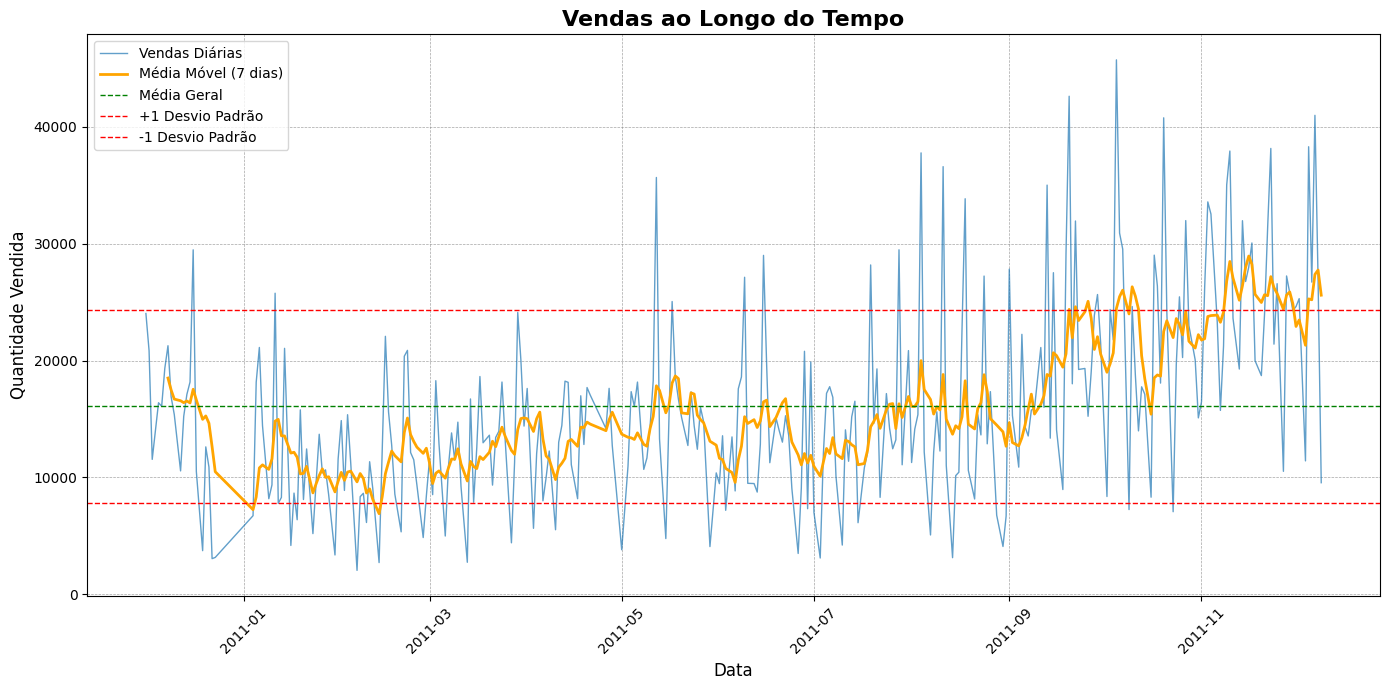

In [7]:
# Visualizando Padrões de Compra com Estatísticas

import matplotlib.pyplot as plt

# Calcular vendas diárias
daily_sales = df.groupby("Date")["Quantity"].sum()

# Calcular média móvel (janela de 7 dias)
daily_sales_rolling = daily_sales.rolling(window=7).mean()

# Calcular média geral e desvios padrão
mean_sales = daily_sales.mean()
std_sales = daily_sales.std()

# Criar gráfico de vendas ao longo do tempo
plt.figure(figsize=(14, 7))
plt.plot(daily_sales, label="Vendas Diárias", color="#1f77b4", linewidth=1, alpha=0.7)
plt.plot(daily_sales_rolling, label="Média Móvel (7 dias)", color="orange", linewidth=2)


# Adicionar linhas de média e desvios padrão
plt.axhline(mean_sales, color="green", linestyle="--", linewidth=1, label="Média Geral")
plt.axhline(
    mean_sales + std_sales,
    color="red",
    linestyle="--",
    linewidth=1,
    label="+1 Desvio Padrão",
)
plt.axhline(
    mean_sales - std_sales,
    color="red",
    linestyle="--",
    linewidth=1,
    label="-1 Desvio Padrão",
)

# Configurações do gráfico
plt.xlabel("Data", fontsize=12)
plt.ylabel("Quantidade Vendida", fontsize=12)
plt.title("Vendas ao Longo do Tempo", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

C:\Users\bruno\AppData\Local\Temp\ipykernel_21608\2053349031.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(meses)


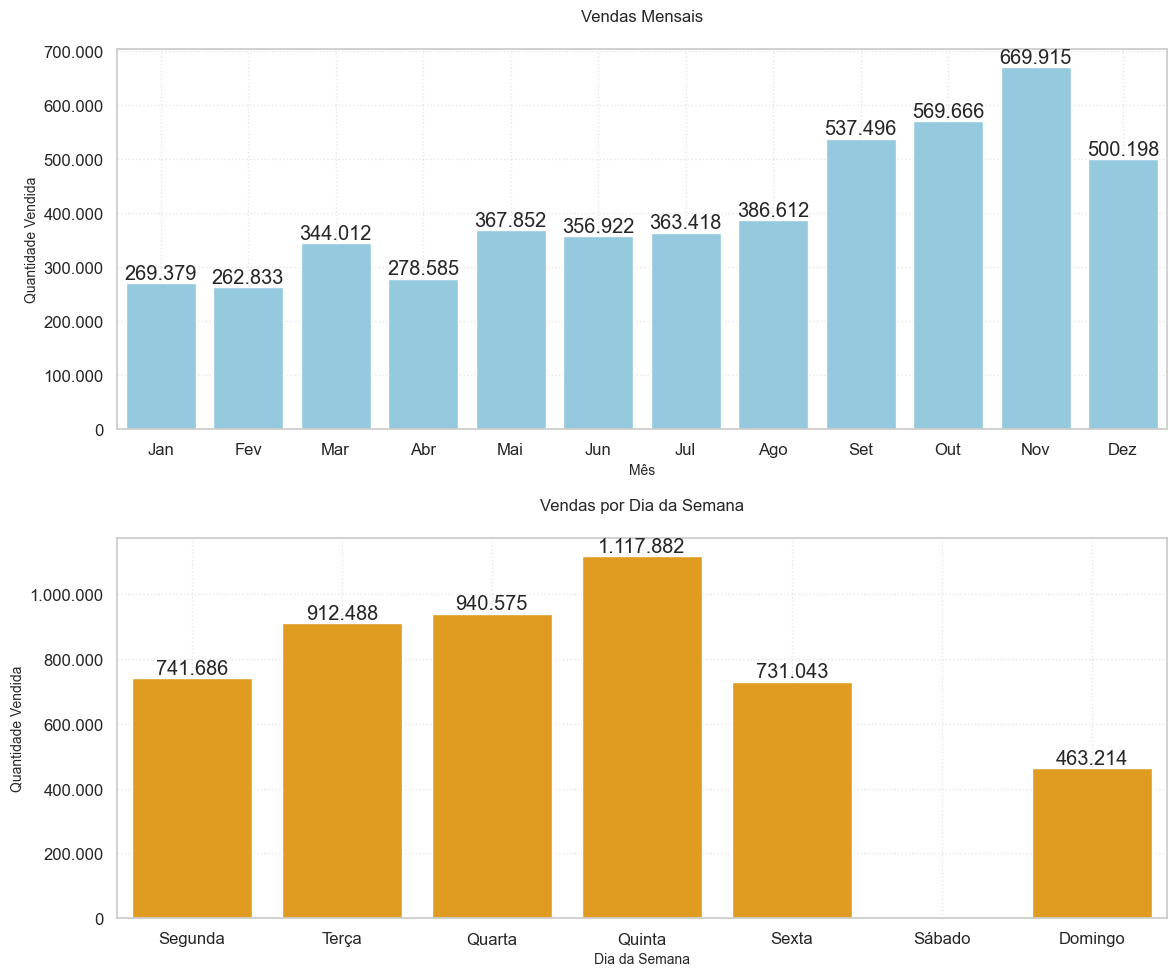

In [ ]:
import seaborn as sns
import locale


locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

df["Month"] = df["InvoiceDate"].dt.month
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()

monthly_sales = df.groupby("Month")["Quantity"].sum()

weekly_sales = df.groupby("DayOfWeek")["Quantity"].sum()


sns.set_style("whitegrid", {"grid.linestyle": ":"})


# Criar gráficos de vendas

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))



# Função para formatar os números no eixo Y

def format_y_axis(x, p):

    return locale.format_string("%d", x, grouping=True)



# Vendas por Mês

sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax1, color="skyblue")


# Adicionar rótulos de valor nas barras com formato brasileiro
for i, v in enumerate(monthly_sales.values):
    formatted_value = locale.format_string("%d", v, grouping=True)
    ax1.text(i, v, formatted_value, ha="center", va="bottom")

ax1.set_xlabel("Mês", fontsize=10)
ax1.set_ylabel("Quantidade Vendida", fontsize=10)
ax1.set_title("Vendas Mensais", fontsize=12, pad=20)

# Converter números dos meses para nomes em português
meses = [
    "Jan",
    "Fev",
    "Mar",
    "Abr",
    "Mai",
    "Jun",
    "Jul",
    "Ago",
    "Set",
    "Out",
    "Nov",
    "Dez",
]
ax1.set_xticklabels(meses)

# Configurar grade e formato do eixo Y com locale
ax1.grid(color="gray", linestyle=":", alpha=0.2)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

# Vendas por Dia da Semana
dias_semana = {
    "Monday": "Segunda",
    "Tuesday": "Terça",
    "Wednesday": "Quarta",
    "Thursday": "Quinta",
    "Friday": "Sexta",
    "Saturday": "Sábado",
    "Sunday": "Domingo",
}

weekly_sales = weekly_sales.fillna(0)
weekly_sales.index = weekly_sales.index.map(dias_semana)
ordem_dias = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
weekly_sales = weekly_sales.reindex(ordem_dias)

sns.barplot(x=weekly_sales.index, y=weekly_sales.values, ax=ax2, color="orange")

for i, v in enumerate(weekly_sales.values):
    if pd.isna(v) or v is None:
        formatted_value = "0"
    else:
        formatted_value = locale.format_string("%d", int(float(v)), grouping=True)

    ax2.text(i, v, formatted_value, ha="center", va="bottom")

ax2.set_xlabel("Dia da Semana", fontsize=10)
ax2.set_ylabel("Quantidade Vendida", fontsize=10)
ax2.set_title("Vendas por Dia da Semana", fontsize=12, pad=20)

# Configurar grade e formato do eixo Y com locale
ax2.grid(color="gray", linestyle=":", alpha=0.2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

plt.tight_layout()
plt.show()

                       antecedents                                        consequents  support  confidence  lift
0     (ALARM CLOCK BAKELIKE GREEN)                        (ALARM CLOCK BAKELIKE RED )     0.04        0.67 10.40
100  (WOODEN FRAME ANTIQUE WHITE )                (WOODEN PICTURE FRAME WHITE FINISH)     0.03        0.58  8.94
111      (LUNCH BAG PINK POLKADOT)     (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT)     0.02        0.30  8.88
107      (LUNCH BAG PINK POLKADOT)  (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROS...     0.02        0.33  8.69
2          (HEART OF WICKER LARGE)                            (HEART OF WICKER SMALL)     0.03        0.51  7.18


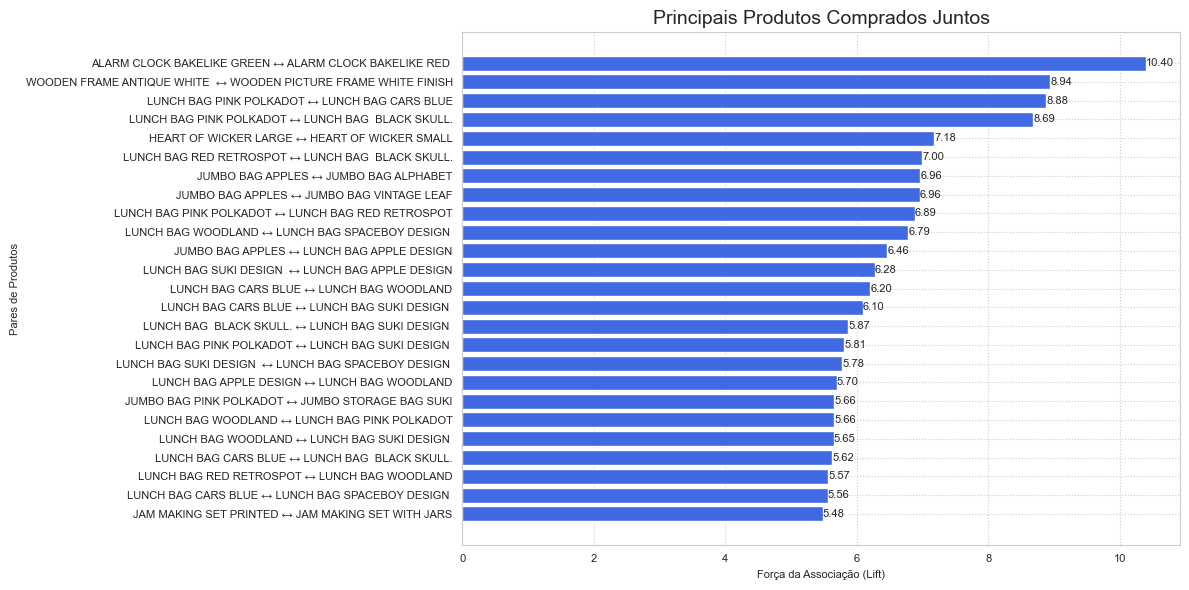

In [9]:
# Analisando Produtos Comprados Juntos

import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

df_filtered_association = df

# Remover cancelamentos (pedidos com quantidade negativa)
df_filtered_association = df_filtered_association[
    df_filtered_association["Quantity"] > 0
]

# Selecionar apenas os 50 produtos mais vendidos para reduzir complexidade
top_products = df_filtered_association["Description"].value_counts().head(50).index
df_filtered_association = df_filtered_association[
    df_filtered_association["Description"].isin(top_products)
]

# Criar tabela onde cada linha representa uma transação e as colunas os produtos comprados
basket = df_filtered_association.pivot_table(
    index="InvoiceNo", columns="Description", values="Quantity", aggfunc="sum"
).fillna(0)

# Converter valores para binário (True se comprado, False se não)
basket = basket > 0

# Aplicar algoritmo Apriori para encontrar produtos comprados juntos
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Ordenar regras por maior Lift (quanto maior, mais forte a associação)
rules = rules.sort_values(by="lift", ascending=False)

unique_pairs = []
unique_rules = []

for idx, row in rules.iterrows():
    current_pair = tuple(
        sorted([tuple(row["antecedents"])[0], tuple(row["consequents"])[0]])
    )
    if current_pair not in unique_pairs:
        unique_pairs.append(current_pair)
        unique_rules.append(row)

rules_unique = pd.DataFrame(unique_rules)


def plot_top_associations(rules_unique, top_n=10):
    # Filtrar as principais regras de associação
    top_rules = rules_unique.sort_values(by="lift", ascending=False).head(top_n)

    # Criar lista de pares de produtos
    pairs = [
        f"{list(rule['antecedents'])[0]} ↔ {list(rule['consequents'])[0]}"
        for _, rule in top_rules.iterrows()
    ]
    lifts = top_rules["lift"]

    # Criar gráfico de barras
    plt.figure(figsize=(12, 6))
    plt.barh(pairs, lifts, color="royalblue")
    plt.xlabel("Força da Associação (Lift)", fontsize=8)
    plt.ylabel("Pares de Produtos", fontsize=8)
    plt.title("Principais Produtos Comprados Juntos", fontsize=14)
    plt.gca().invert_yaxis()

    # Ajustar tamanho da fonte e espaçamento
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

    # Adicionar valores nas barras
    for i, v in enumerate(lifts):
        plt.text(v, i, f"{v:.2f}", va="center", fontsize=8)

    plt.show()

# Exibir as 5 principais regras únicas
print(rules_unique[["antecedents", "consequents", "support", "confidence", "lift"]].head(5))

# Plotar o gráfico com as regras únicas
plot_top_associations(rules_unique, top_n=25)

### Problemas e Soluções Adotadas

1. **Problema: MemoryError ao gerar matriz de produtos comprados juntos**

    - **Causa**: A matriz gerada era muito grande, consumindo mais memória do que o disponível.
    - **Solução**:
        - Filtrar apenas os 50 produtos mais vendidos para reduzir a complexidade.
        - Trabalhar com transações relevantes, como um subconjunto temporal (últimos 6 meses).
        - Converter os dados para tipos mais leves, como `int8`, para economizar memória.

2. **Problema: Valores ausentes e inconsistentes no dataset**

    - **Causa**: Colunas como `Description` e `CustomerID` apresentavam valores ausentes.
    - **Solução**:
        - Remover registros sem `CustomerID`, essenciais para segmentação.
        - Tratar valores ausentes em outras colunas com estratégias adequadas.

3. **Problema: Cancelamentos e devoluções**

    - **Causa**: Quantidades negativas indicavam devoluções ou cancelamentos.
    - **Solução**:
        - Separar os registros de cancelamentos para análise específica.
        - Identificar os produtos mais frequentemente cancelados.

4. **Problema: Duplicatas no dataset**
    - **Causa**: Registros duplicados aumentavam o volume de dados desnecessariamente.
    - **Solução**:
        - Remover 5.225 registros duplicados para garantir a consistência.

Essas soluções garantiram a qualidade dos dados e viabilizaram análises mais eficientes.


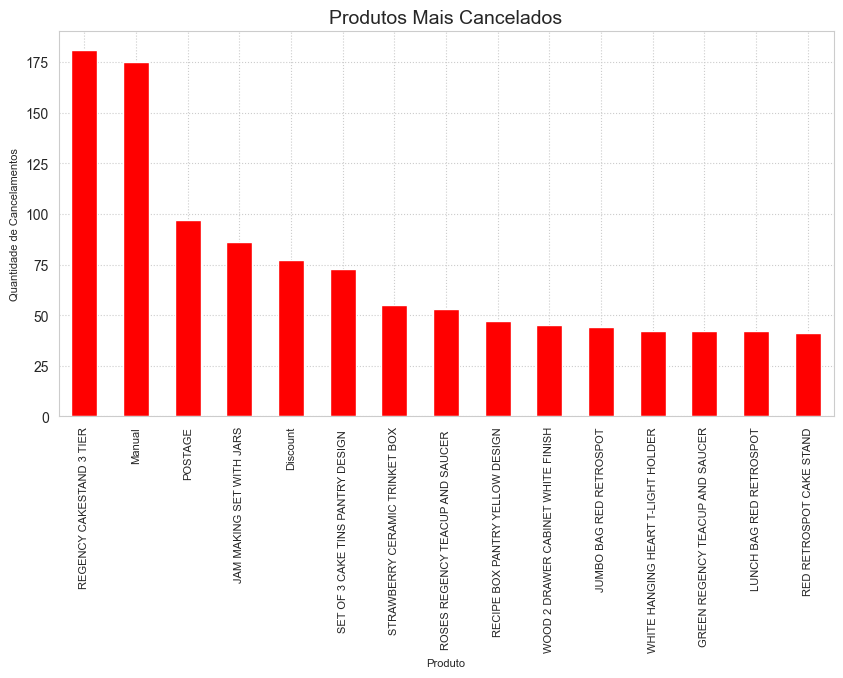

In [10]:
# Analisando Fatores que Contribuem para Cancelamentos

# Filtrar apenas os pedidos cancelados
df_cancelados = df[df["Quantity"] < 0]

# Contar os produtos mais frequentemente cancelados
produtos_cancelados = df_cancelados["Description"].value_counts().head(15)

# Criar um gráfico de barras para os produtos mais cancelados
plt.figure(figsize=(10, 5))
produtos_cancelados.plot(kind="bar", color="red")
plt.xlabel("Produto", fontsize=8)
plt.ylabel("Quantidade de Cancelamentos", fontsize=8)
plt.title("Produtos Mais Cancelados", fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.show()

# Passo 4: Segmentação de Clientes


Número ideal de clusters: 2

Perfis de Clientes:
          Ticket Médio (Média)  Ticket Médio (Min)  Ticket Médio (Max)  Freq. Compras (Média)  Freq. Compras (Min)  Freq. Compras (Max)  Valor Total Médio  Valor Total Agregado  Dias Média S/ Compra  Máx Dias S/ Compra
Segmento                                                                                                                                                                                                                  
0                       544.38                4.21             3861.00                  66.73                    1                  248           62164.28            2051421.37               4878.61                5093
1                        27.31                0.00             1001.20                   4.65                    1                   53            1462.79            6285625.54               4948.23                5231


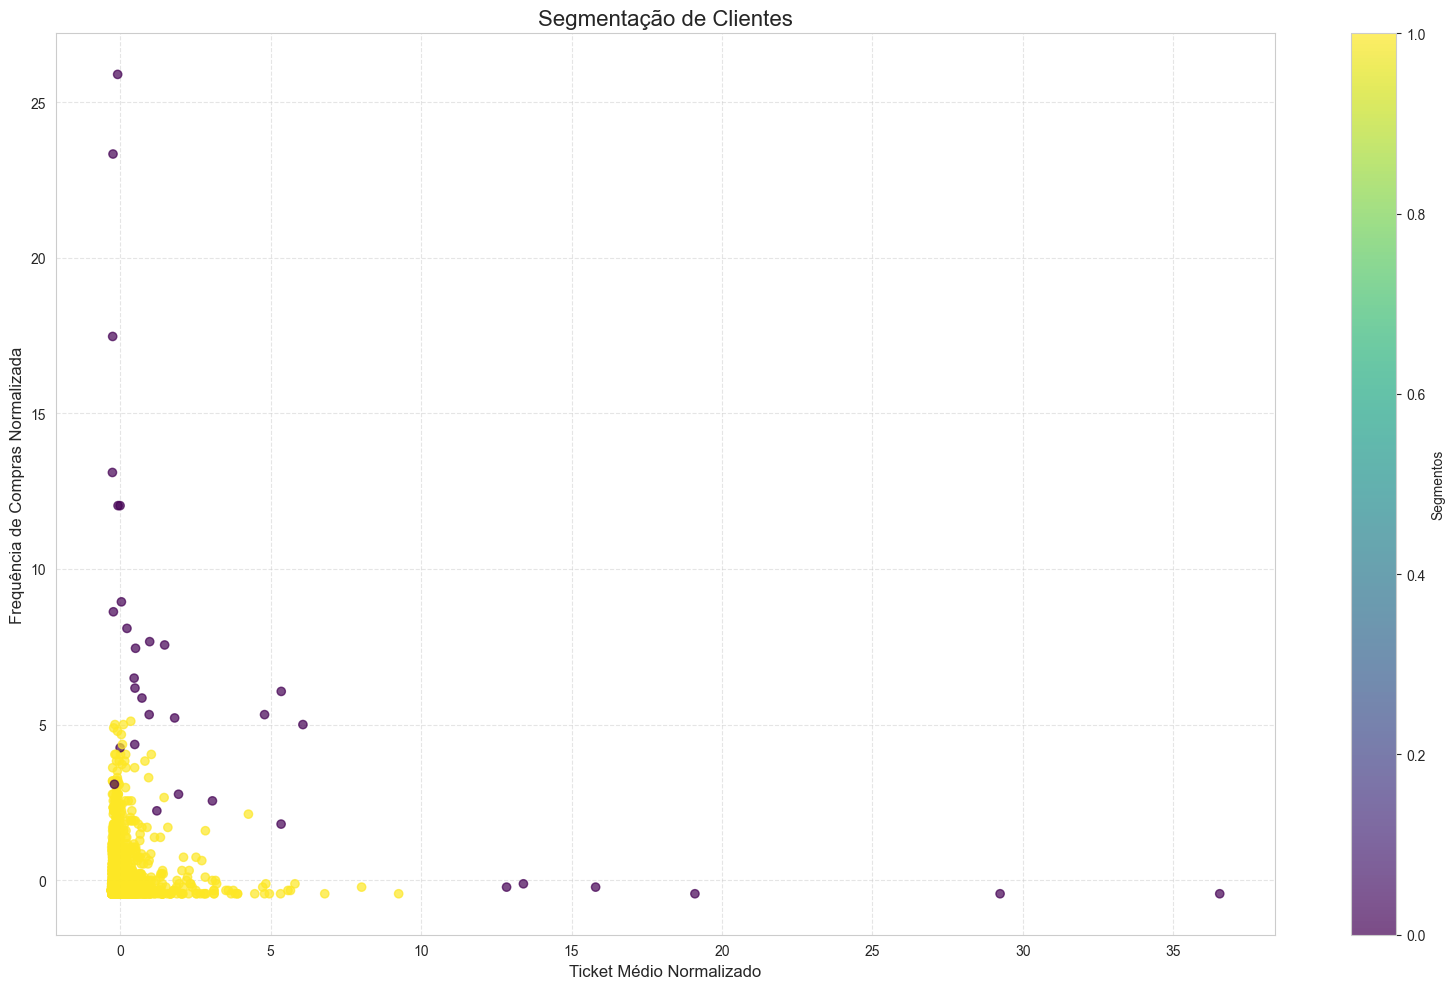


ESTRATÉGIAS DE RETENÇÃO POR SEGMENTO:

Segmento 0:
Perfil: Cliente de Alto Valor
Estratégias de Retenção:
- Programa de fidelidade premium
- Atendimento personalizado
- Descontos exclusivos
Ações de Marketing:
- Convites para eventos especiais
- Comunicação personalizada
- Benefícios VIP

Segmento 1:
Perfil: Cliente Ocasional
Estratégias de Retenção:
- Campanhas de reativação
- Incentivos para compras frequentes
- Descontos em primeiro pedido
Ações de Marketing:
- E-mails personalizados de reengajamento
- Ofertas por tempo limitado
- Cupons de desconto


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


def preprocessar_dados(df):
    df_processado = df.copy()

    # Converter UltimaCompra para datetime se não for
    if not pd.api.types.is_datetime64_any_dtype(df_processado["UltimaCompra"]):
        df_processado["UltimaCompra"] = pd.to_datetime(
            df_processado["UltimaCompra"], errors="coerce"
        )

    # Calcular dias desde a última compra
    df_processado["DiasDesdeUltimaCompra"] = (
        pd.Timestamp.now() - df_processado["UltimaCompra"]
    ).dt.days

    # Garantir que colunas numéricas sejam do tipo float
    colunas_numericas = ["TicketMedio", "FrequenciaCompra", "ValorTotalCompras"]
    for coluna in colunas_numericas:
        df_processado[coluna] = pd.to_numeric(df_processado[coluna], errors="coerce")

    # Tratar valores NaN
    df_processado[colunas_numericas + ["DiasDesdeUltimaCompra"]] = df_processado[
        colunas_numericas + ["DiasDesdeUltimaCompra"]
    ].fillna(df_processado[colunas_numericas + ["DiasDesdeUltimaCompra"]].mean())

    return df_processado


def preparar_caracteristicas_cliente(df):
    df_processado = preprocessar_dados(df)

    # Expandir características para segmentação mais detalhada
    features = [
        "TicketMedio",
        "FrequenciaCompra",
        "ValorTotalCompras",
        "DiasDesdeUltimaCompra",
    ]

    # Criar DataFrame com as características
    X = df_processado[features].copy()

    # Normalizar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Converter para DataFrame mantendo os nomes das colunas
    dados_normalizados = pd.DataFrame(X_scaled, columns=features, index=X.index)

    return dados_normalizados, scaler, df_processado


def determinar_clusters_otimos(dados_normalizados, max_clusters=8):
    scores_silhueta = []
    inertias = []

    # Testar diferentes números de clusters
    K = range(2, max_clusters + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(dados_normalizados)

        # Calcular score de silhueta
        score = silhouette_score(dados_normalizados, clusters)
        scores_silhueta.append(score)
        inertias.append(kmeans.inertia_)

    # Encontrar o melhor número de clusters
    melhor_k = K[np.argmax(scores_silhueta)]

    return melhor_k


def criar_perfis_clientes(df_segmentacao, clusters, dados_normalizados):
    df_segmentacao["Segmento"] = clusters

    perfis = (
        df_segmentacao.groupby("Segmento")
        .agg(
            {
                "TicketMedio": ["mean", "min", "max"],
                "FrequenciaCompra": ["mean", "min", "max"],
                "ValorTotalCompras": ["mean", "sum"],
                "DiasDesdeUltimaCompra": ["mean", "max"],
            }
        )
        .round(2)
    )

    perfis.columns = [
        "Ticket Médio (Média)",
        "Ticket Médio (Min)",
        "Ticket Médio (Max)",
        "Freq. Compras (Média)",
        "Freq. Compras (Min)",
        "Freq. Compras (Max)",
        "Valor Total Médio",
        "Valor Total Agregado",
        "Dias Média S/ Compra",
        "Máx Dias S/ Compra",
    ]

    return perfis


def estrategias_retencao(perfis):
    estrategias = {}

    for segmento, dados in perfis.iterrows():
        estrategias[segmento] = {
            "Perfil": "",
            "Estratégias de Retenção": [],
            "Ações de Marketing": [],
        }

        # Definir perfil e estratégias com base nas características
        if dados["Ticket Médio (Média)"] > perfis["Ticket Médio (Média)"].mean():
            estrategias[segmento]["Perfil"] = "Cliente de Alto Valor"
            estrategias[segmento]["Estratégias de Retenção"] = [
                "Programa de fidelidade premium",
                "Atendimento personalizado",
                "Descontos exclusivos",
            ]
            estrategias[segmento]["Ações de Marketing"] = [
                "Convites para eventos especiais",
                "Comunicação personalizada",
                "Benefícios VIP",
            ]
        elif dados["Freq. Compras (Média)"] < perfis["Freq. Compras (Média)"].mean():
            estrategias[segmento]["Perfil"] = "Cliente Ocasional"
            estrategias[segmento]["Estratégias de Retenção"] = [
                "Campanhas de reativação",
                "Incentivos para compras frequentes",
                "Descontos em primeiro pedido",
            ]
            estrategias[segmento]["Ações de Marketing"] = [
                "E-mails personalizados de reengajamento",
                "Ofertas por tempo limitado",
                "Cupons de desconto",
            ]
        else:
            estrategias[segmento]["Perfil"] = "Cliente Regular"
            estrategias[segmento]["Estratégias de Retenção"] = [
                "Programa de pontos",
                "Comunicação frequente",
                "Descontos progressivos",
            ]
            estrategias[segmento]["Ações de Marketing"] = [
                "Newsletter personalizada",
                "Recomendações de produtos",
                "Promoções sazonais",
            ]

    return estrategias


def segmentar_clientes(df_segmentacao_clientes):
    df_segmentacao_clientes = df_segmentacao_clientes[df_segmentacao_clientes["ValorTotalCompras"] > 0]

    dados_normalizados, scaler, df_processado = preparar_caracteristicas_cliente(
        df_segmentacao_clientes
    )

    # Determinar número ideal de clusters
    n_clusters = determinar_clusters_otimos(dados_normalizados)
    print(f"Número ideal de clusters: {n_clusters}")

    # Aplicar KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(dados_normalizados)

    # Criar perfis de clientes
    perfis = criar_perfis_clientes(df_processado, clusters, dados_normalizados)
    print("\nPerfis de Clientes:")
    print(perfis)

    # Definir estratégias de retenção
    estrategias = estrategias_retencao(perfis)

    # Visualização dos clusters
    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(
        dados_normalizados["TicketMedio"],
        dados_normalizados["FrequenciaCompra"],
        c=clusters,
        cmap="viridis",
        alpha=0.7,
    )
    plt.title("Segmentação de Clientes", fontsize=16)
    plt.xlabel("Ticket Médio Normalizado", fontsize=12)
    plt.ylabel("Frequência de Compras Normalizada", fontsize=12)
    plt.colorbar(scatter, label="Segmentos")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    print("\nESTRATÉGIAS DE RETENÇÃO POR SEGMENTO:")
    for segmento, dados in estrategias.items():
        print(f"\nSegmento {segmento}:")
        print(f"Perfil: {dados['Perfil']}")
        print("Estratégias de Retenção:")
        for estrategia in dados["Estratégias de Retenção"]:
            print(f"- {estrategia}")
        print("Ações de Marketing:")
        for acao in dados["Ações de Marketing"]:
            print(f"- {acao}")

    return df_processado, perfis, estrategias

resultado, perfis, estrategias = segmentar_clientes(df_clientes)

# Passo 5: Insights e Recomendações


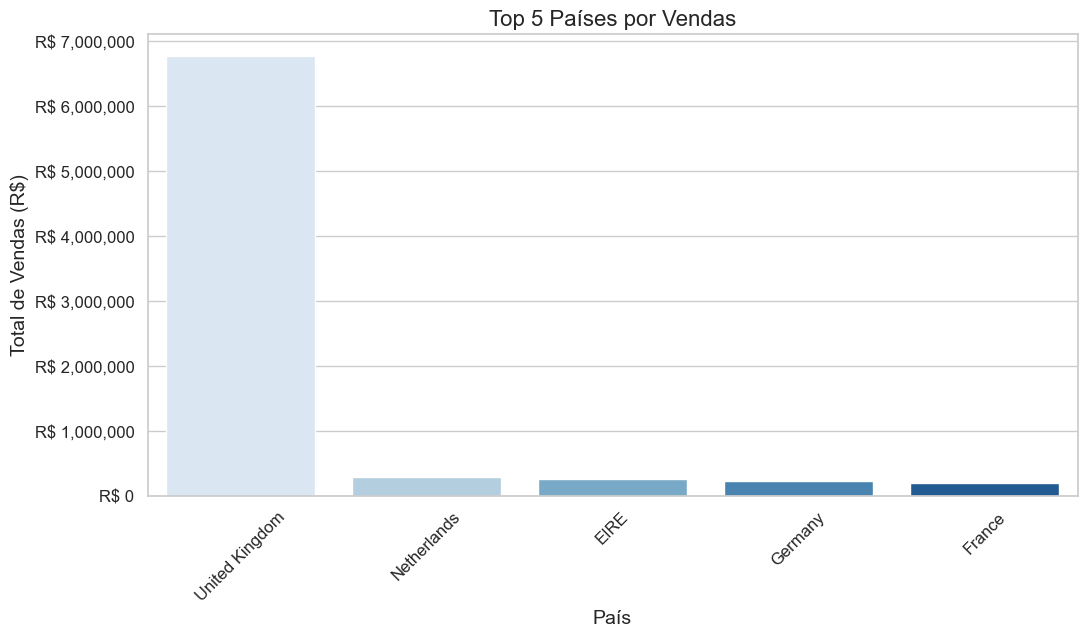

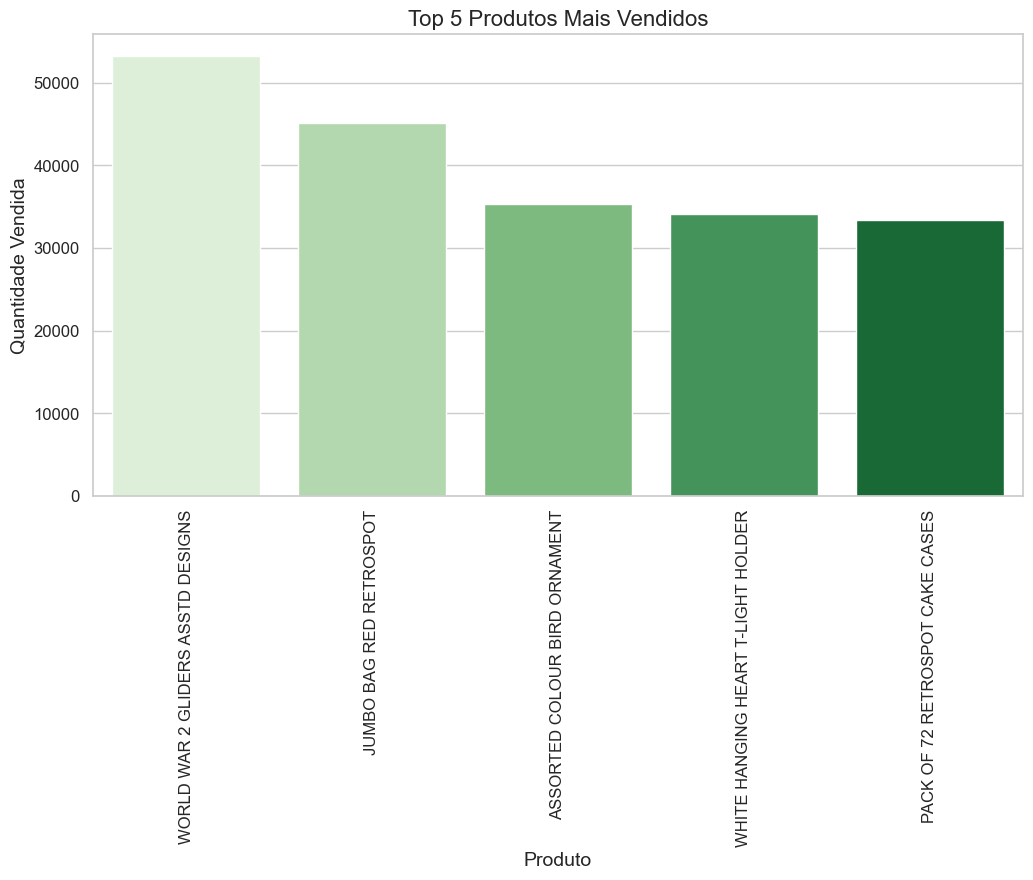

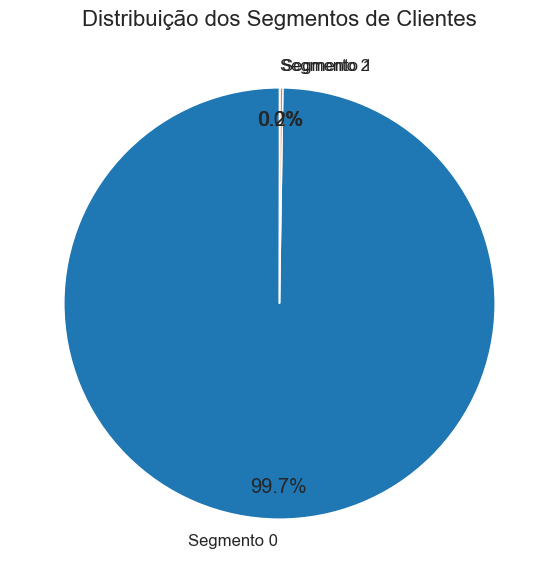

C:\Users\bruno\AppData\Local\Temp\ipykernel_21608\3902218271.py:73: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x=risco_counts.index, y=risco_counts.values, hue=risco_counts.index, palette=["#2ca02c", "#ff7f0e", "#d62728"], legend=False)


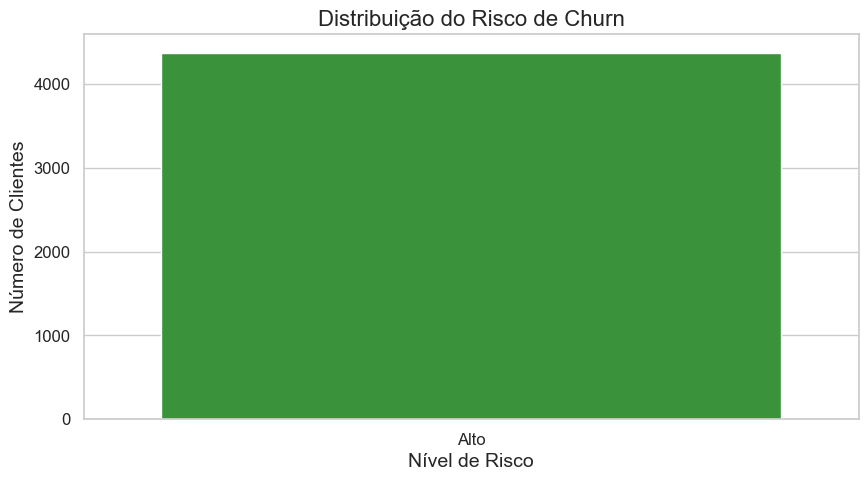

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Definir locale para português do Brasil
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

# Configuração global para melhorar visualização
tam_fonte = 14
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.rcParams.update({
    "axes.titlesize": tam_fonte + 2,
    "axes.labelsize": tam_fonte,
    "xtick.labelsize": tam_fonte - 2,
    "ytick.labelsize": tam_fonte - 2,
    "legend.fontsize": tam_fonte - 2
})

class GeradorInsights:
    def __init__(self, df):
        self.df = df.copy()

    def preparar_dados(self):
        self.df["InvoiceDate"] = pd.to_datetime(self.df["InvoiceDate"], errors="coerce")
        self.df[["TotalGasto", "Quantity", "UnitPrice"]] = self.df[["TotalGasto", "Quantity", "UnitPrice"]].apply(pd.to_numeric, errors="coerce")
        self.df.dropna(subset=["CustomerID", "StockCode", "Description"], inplace=True)
        return self

    def visao_vendas(self):
        vendas_por_pais = self.df.groupby("Country")["TotalGasto"].sum().nlargest(5)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=vendas_por_pais.index, y=vendas_por_pais.values, hue=vendas_por_pais.index, palette="Blues", legend=False)
        plt.title("Top 5 Países por Vendas")
        plt.xlabel("País")
        plt.ylabel("Total de Vendas (R$)")
        plt.xticks(rotation=45)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"R$ {x:,.0f}"))
        plt.show()

    def desempenho_produtos(self):
        produtos_mais_vendidos = self.df.groupby("Description")["Quantity"].sum().nlargest(5)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=produtos_mais_vendidos.index, y=produtos_mais_vendidos.values, hue=produtos_mais_vendidos.index, palette="Greens", legend=False)
        plt.title("Top 5 Produtos Mais Vendidos")
        plt.xlabel("Produto")
        plt.ylabel("Quantidade Vendida")
        plt.xticks(rotation=90)
        plt.show()

    def segmentar_clientes(self):
        X = self.df.groupby("CustomerID")[["TotalGasto", "Quantity"]].agg(["mean", "sum"])
        X.columns = ["_".join(col).strip() for col in X.columns.values]
        X_scaled = StandardScaler().fit_transform(X)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        X["Cluster"] = kmeans.fit_predict(X_scaled)

        plt.figure(figsize=(7, 7))
        plt.pie(X["Cluster"].value_counts(), labels=[f"Segmento {i}" for i in X["Cluster"].unique()], autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e", "#2ca02c"], startangle=90, pctdistance=0.85)
        plt.title("Distribuição dos Segmentos de Clientes")
        plt.show()

    def risco_churn(self):
        ultima_compra = self.df.groupby("CustomerID")["InvoiceDate"].max()
        dias_desde_ultima = (pd.Timestamp.now() - ultima_compra).dt.days
        risco = dias_desde_ultima.apply(lambda d: "Baixo" if d < 30 else "Médio" if d < 90 else "Alto")
        risco_counts = risco.value_counts()

        plt.figure(figsize=(10, 5))
        sns.barplot(x=risco_counts.index, y=risco_counts.values, hue=risco_counts.index, palette=["#2ca02c", "#ff7f0e", "#d62728"], legend=False)
        plt.title("Distribuição do Risco de Churn")
        plt.xlabel("Nível de Risco")
        plt.ylabel("Número de Clientes")
        plt.show()

    def gerar_insights(self):
        self.preparar_dados()
        self.visao_vendas()
        self.desempenho_produtos()
        self.segmentar_clientes()
        self.risco_churn()

insights = GeradorInsights(df)
insights.gerar_insights()


### *1. Estratégia de Cross-Sell*
Cross-sell envolve a venda de produtos complementares aos clientes com base em seus comportamentos de compra anteriores. A ideia é sugerir itens que "casam" bem com o que o cliente já comprou ou está interessado em comprar.

#### *Insight de Cross-Sell:*
- *Combinação de Produtos de Alta Venda com Produtos Lucrativos:*
  - *Exemplo:* Se um cliente comprar um *"WORLD WAR 2 GLIDERS ASSTD DESIGNS"* (produto mais vendido), você pode oferecer um *"REGENCY CAKESTAND 3 TIER"* ou uma *"JUMBO BAG RED RETROSPOT"* como itens complementares. Esses produtos são lucrativos e poderiam ser vendidos juntos em um pacote promocional, oferecendo um desconto ao cliente na compra conjunta.
  
- *Pacote de Produtos de Festa:*
  - Muitos dos produtos mais vendidos são itens para festas e decoração, como o *"WHITE HANGING HEART T-LIGHT HOLDER"* e as *"PARTY BUNTING"*. Esses itens podem ser agrupados em um "kit de decoração de festa". Isso é uma ótima oportunidade de cross-sell, pois os clientes que compram um item de festa geralmente têm interesse em mais produtos para complementar a decoração.

- *Sugestões Personalizadas com Base no Cluster:*
  - Os clusters 0 e 1 têm características de compras frequentes e de maior valor médio. Para esses grupos, você pode recomendar pacotes de produtos complementares, como:
    - *Cluster 0* (média de 3 compras por cliente): Ofereça produtos como *"ASSORTED COLOURS SILK FAN"* ou *"ASSORTED COLOUR BIRD ORNAMENT"*.
    - *Cluster 1* (frequência muito alta de compras): Ofereça combos de itens mais caros e lucrativos, como *"PICNIC BASKET WICKER 60 PIECE"* e *"BROCADE RING PURSE"*. Ofereça promoções aos sábados, baseado nas últimas compras e aos clientes que tem fidelidade com a lojal. Assim, regristamos vendas aos sábados e aumentamos as vendas dos produtos lucrativos. 

### *2. Estratégia de Upsell*
Upsell foca em oferecer uma versão mais cara ou mais valiosa de um produto que o cliente está comprando.

#### *Insight de Upsell:*
- *Oferecer Versões de Maior Valor:*
  - *Produto Principal:* Se um cliente estiver comprando produtos como o *"JUMBO BAG RED RETROSPOT"* ou *"WHITE HANGING HEART T-LIGHT HOLDER", que são itens populares, você pode sugerir um upgrade para um produto mais caro, como o *"REGENCY CAKESTAND 3 TIER"* ou a *"PICNIC BASKET WICKER 60 PIECES"**, que são mais lucrativos e também atraentes para quem busca itens exclusivos ou sofisticados.
  
- *Promoções de Upsell para Clientes de Alto Risco de Churn:*
  - Para os clientes com *alto risco de churn* (1132 clientes), você pode criar promoções especiais de upsell, como descontos progressivos em produtos de maior valor quando eles compram um item mais barato. Por exemplo:
    - "Compre o *WHITE HANGING HEART T-LIGHT HOLDER* e leve com 20% de desconto o *PICNIC BASKET WICKER 60 PIECES*."
    - Isso ajudaria a aumentar o valor médio de transação, ao mesmo tempo em que oferece um incentivo para reter esses clientes.

- *Pacotes de Upsell para Clusters com Alto Ticket Médio:*
  - *Cluster 1* (ticket médio de 81,20) já está disposto a gastar mais, então ofereça combos de maior valor com *"REGENCY CAKESTAND 3 TIER", *"CHILLI LIGHTS"*, ou *"BLACK RECORD COVER FRAME"**. Se os clientes já estão comprando produtos de médio valor, eles provavelmente estarão abertos a considerar um upgrade para um pacote de produtos de maior valor.